In [12]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
%matplotlib notebook
from scipy.stats import linregress



In [13]:
#Allereerst moet de data worden ingelezen
df = pd.read_excel('/home/14109999/notebooks/KB-74-OPSCHALER/Personal_folders/Megan/Opdracht Lucas de Lange.xlsx',header = 0, delimiter="\t")

In [14]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 22 columns):
Year                                             27 non-null object
Population1                                      20 non-null float64
Violent
crime2                                   20 non-null float64
Violent 
crime 
rate                             22 non-null object
Murder and
nonnegligent 
manslaughter            20 non-null float64
Murder and 
nonnegligent 
manslaughter 
rate     20 non-null float64
Rape
(revised 
definition3)                      5 non-null object
Rape
(revised 
definition) 
rate3                4 non-null float64
Rape
(legacy 
definition4)                       20 non-null float64
Rape
(legacy 
definition) 
rate4                 20 non-null float64
Robbery                                          20 non-null float64
Robbery 
rate                                    20 non-null float64
Aggravated 
assault                              20 non-null float64
Aggra

,Year,Population1,Violent crime2,Violent crime rate,Murder and nonnegligent manslaughter,Murder and nonnegligent manslaughter rate,Rape (revised definition3),Rape (revised definition) rate3,Rape (legacy definition4),Rape (legacy definition) rate4,...,Aggravated assault,Aggravated assault rate,Property crime,Property crime rate,Burglary,Burglary rate,Larceny- theft,Larceny- theft rate,Motor vehicle theft,Motor vehicle theft rate
0,1997,267783607.0,1636096.0,611,18208.0,6.8,NaN,NaN,96153.0,35.9,...,1023201.0,382.1,11558475.0,4316.3,2460526,918.8,7743760.0,2891.8,1354189.0,505.7
1,1998,270248003.0,1533887.0,567.6,16974.0,6.3,NaN,NaN,93144.0,34.5,...,976583.0,361.4,10951827.0,4052.5,2332735,863.2,7376311.0,2729.5,1242781.0,459.9
2,1999,272690813.0,1426044.0,523,15522.0,5.7,NaN,NaN,89411.0,32.8,...,911740.0,334.3,10208334.0,3743.6,2100739,770.4,6955520.0,2550.7,1152075.0,422.5
3,2000,281421906.0,1425486.0,506.5,15586.0,5.5,NaN,NaN,90178.0,32.0,...,911706.0,324,10182584.0,3618.3,2050992,728.8,6971590.0,2477.3,1160002.0,412.2
4,20015,285317559.0,1439480.0,504.5,16037.0,5.6,NaN,NaN,90863.0,31.8,...,909023.0,318.6,10437189.0,3658.1,2116531,741.8,7092267.0,2485.7,1228391.0,430.5


<IPython.core.display.Javascript object>


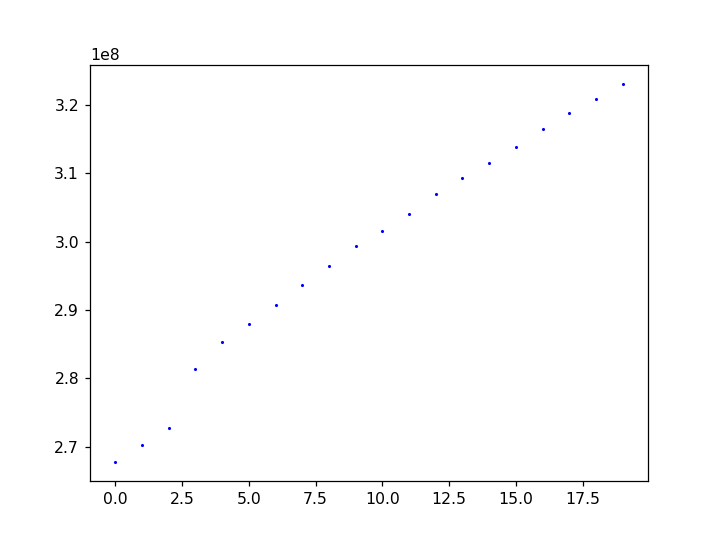

In [15]:
df.tail() #Kan gebruikt worden voor het einde van df, maar we weten al dat er 19 kolommen zijn
plt.plot(df['Population1'],'.', color="blue", ms=2)
#Ik heb deze plot gemaakt om te testen of de functie plt.plot werkt. Er is te zien dat de populatie groeit

In [16]:
df.iloc[:23,:22]
#met de functie iloc heb ik de kolommen geselecteerd die ik wilde hebben, het was ook mogelijk om 

,Year,Population1,Violent crime2,Violent crime rate,Murder and nonnegligent manslaughter,Murder and nonnegligent manslaughter rate,Rape (revised definition3),Rape (revised definition) rate3,Rape (legacy definition4),Rape (legacy definition) rate4,...,Aggravated assault,Aggravated assault rate,Property crime,Property crime rate,Burglary,Burglary rate,Larceny- theft,Larceny- theft rate,Motor vehicle theft,Motor vehicle theft rate
0,1997,267783607.0,1636096.0,611,18208.0,6.8,NaN,NaN,96153.0,35.9,...,1023201.0,382.1,11558475.0,4316.3,2460526,918.8,7743760.0,2891.8,1354189.0,505.7
1,1998,270248003.0,1533887.0,567.6,16974.0,6.3,NaN,NaN,93144.0,34.5,...,976583.0,361.4,10951827.0,4052.5,2332735,863.2,7376311.0,2729.5,1242781.0,459.9
2,1999,272690813.0,1426044.0,523,15522.0,5.7,NaN,NaN,89411.0,32.8,...,911740.0,334.3,10208334.0,3743.6,2100739,770.4,6955520.0,2550.7,1152075.0,422.5
3,2000,281421906.0,1425486.0,506.5,15586.0,5.5,NaN,NaN,90178.0,32.0,...,911706.0,324,10182584.0,3618.3,2050992,728.8,6971590.0,2477.3,1160002.0,412.2
4,20015,285317559.0,1439480.0,504.5,16037.0,5.6,NaN,NaN,90863.0,31.8,...,909023.0,318.6,10437189.0,3658.1,2116531,741.8,7092267.0,2485.7,1228391.0,430.5
5,2002,287973924.0,1423677.0,494.4,16229.0,5.6,NaN,NaN,95235.0,33.1,...,891407.0,309.5,10455277.0,3630.6,2151252,747.0,7057379.0,2450.7,1246646.0,432.9
6,2003,290788976.0,1383676.0,475.8,16528.0,5.7,NaN,NaN,93883.0,32.3,...,859030.0,295.4,10442862.0,3591.2,2154834,741.0,7026802.0,2416.5,1261226.0,433.7
7,2004,293656842.0,1360088.0,463.2,16148.0,5.5,NaN,NaN,95089.0,32.4,...,847381.0,288.6,10319386.0,3514.1,2144446,730.3,6937089.0,2362.3,1237851.0,421.5
8,2005,296507061.0,1390745.0,469,16740.0,5.6,NaN,NaN,94347.0,31.8,...,862220.0,290.8,10174754.0,3431.5,2155448,726.9,6783447.0,2287.8,1235859.0,416.8
9,2006,299398484.0,1435123.0,479.3,17309.0,5.8,,NaN,94472.0,31.6,...,874096.0,292,10019601.0,3346.6,2194993,733.1,6626363.0,2213.2,1198245.0,400.2


In [17]:
#Er is te zien dat de laatste drie rijen veel NaN's bevatten, deze kolommen moeten dus gedropt worden

In [53]:
df[:-22]
#Er zaten veel NaN's in de dataset voornamelijk in de laatste rijen, dus om deze eruit te halen heb ik gebruikt gemaakt van de functie

,Year,Population1,Violent crime2,Violent crime rate,Murder and nonnegligent manslaughter,Murder and nonnegligent manslaughter rate,Rape (revised definition3),Rape (revised definition) rate3,Rape (legacy definition4),Rape (legacy definition) rate4,...,Aggravated assault,Aggravated assault rate,Property crime,Property crime rate,Burglary,Burglary rate,Larceny- theft,Larceny- theft rate,Motor vehicle theft,Motor vehicle theft rate
0,1997,267783607.0,1636096.0,611,18208.0,6.8,NaN,NaN,96153.0,35.9,...,1023201.0,382.1,11558475.0,4316.3,2460526,918.8,7743760.0,2891.8,1354189.0,505.7
1,1998,270248003.0,1533887.0,567.6,16974.0,6.3,NaN,NaN,93144.0,34.5,...,976583.0,361.4,10951827.0,4052.5,2332735,863.2,7376311.0,2729.5,1242781.0,459.9
2,1999,272690813.0,1426044.0,523,15522.0,5.7,NaN,NaN,89411.0,32.8,...,911740.0,334.3,10208334.0,3743.6,2100739,770.4,6955520.0,2550.7,1152075.0,422.5
3,2000,281421906.0,1425486.0,506.5,15586.0,5.5,NaN,NaN,90178.0,32.0,...,911706.0,324,10182584.0,3618.3,2050992,728.8,6971590.0,2477.3,1160002.0,412.2
4,20015,285317559.0,1439480.0,504.5,16037.0,5.6,NaN,NaN,90863.0,31.8,...,909023.0,318.6,10437189.0,3658.1,2116531,741.8,7092267.0,2485.7,1228391.0,430.5
5,2002,287973924.0,1423677.0,494.4,16229.0,5.6,NaN,NaN,95235.0,33.1,...,891407.0,309.5,10455277.0,3630.6,2151252,747.0,7057379.0,2450.7,1246646.0,432.9
6,2003,290788976.0,1383676.0,475.8,16528.0,5.7,NaN,NaN,93883.0,32.3,...,859030.0,295.4,10442862.0,3591.2,2154834,741.0,7026802.0,2416.5,1261226.0,433.7
7,2004,293656842.0,1360088.0,463.2,16148.0,5.5,NaN,NaN,95089.0,32.4,...,847381.0,288.6,10319386.0,3514.1,2144446,730.3,6937089.0,2362.3,1237851.0,421.5
8,2005,296507061.0,1390745.0,469,16740.0,5.6,NaN,NaN,94347.0,31.8,...,862220.0,290.8,10174754.0,3431.5,2155448,726.9,6783447.0,2287.8,1235859.0,416.8
9,2006,299398484.0,1435123.0,479.3,17309.0,5.8,,NaN,94472.0,31.6,...,874096.0,292,10019601.0,3346.6,2194993,733.1,6626363.0,2213.2,1198245.0,400.2


In [40]:
df.info()
#Om duidelijker inzicht te krijgen in de datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 22 columns):
Year                                             27 non-null object
Population1                                      20 non-null float64
Violent
crime2                                   20 non-null float64
Violent 
crime 
rate                             22 non-null object
Murder and
nonnegligent 
manslaughter            20 non-null float64
Murder and 
nonnegligent 
manslaughter 
rate     20 non-null float64
Rape
(revised 
definition3)                      5 non-null object
Rape
(revised 
definition) 
rate3                4 non-null float64
Rape
(legacy 
definition4)                       20 non-null float64
Rape
(legacy 
definition) 
rate4                 20 non-null float64
Robbery                                          20 non-null float64
Robbery 
rate                                    20 non-null float64
Aggravated 
assault                              20 non-null float64
Aggra

In [20]:
print(df.columns)
# de kolommen zie er als volgt uit

Index(['Year', 'Population1', 'Violent\ncrime2', 'Violent \ncrime \nrate ',
       'Murder and\nnonnegligent \nmanslaughter',
       'Murder and \nnonnegligent \nmanslaughter \nrate ',
       'Rape\n(revised \ndefinition3)', 'Rape\n(revised \ndefinition) \nrate3',
       'Rape\n(legacy \ndefinition4)', 'Rape\n(legacy \ndefinition) \nrate4',
       'Robbery', 'Robbery \nrate ', 'Aggravated \nassault',
       'Aggravated \nassault rate ', 'Property \ncrime',
       'Property \ncrime \nrate ', 'Burglary', 'Burglary \nrate ',
       'Larceny-\ntheft', 'Larceny-\ntheft rate ', 'Motor \nvehicle \ntheft',
       'Motor \nvehicle \ntheft \nrate '],
      dtype='object')


In [21]:
print(df['Rape\n(revised \ndefinition) \nrate3'].value_counts(dropna=False))

NaN      38
 40.4     1
 35.9     1
 39.3     1
 37.0     1
Name: Rape\n(revised \ndefinition) \nrate3, dtype: int64


In [22]:
#om er verder achter te komen hoe de rest van de df eruit ziet heb ik gebruik gemaakt van df.describe
df.describe()

,Population1,Violent crime2,Murder and nonnegligent manslaughter,Murder and nonnegligent manslaughter rate,Rape (revised definition) rate3,Rape (legacy definition4),Rape (legacy definition) rate4,Robbery,Robbery rate,Aggravated assault,Property crime,Burglary rate,Larceny- theft,Motor vehicle theft,Motor vehicle theft rate
count,2.000000e+01,2.000000e+01,20.00000,20.000000,4.000000,20.000000,20.000000,20.000000,20.000000,2.000000e+01,2.000000e+01,20.000000,2.000000e+01,2.000000e+01,20.000000
mean,2.986348e+08,1.352038e+06,16006.40000,5.375000,38.150000,90689.950000,30.500000,399833.950000,135.015000,8.455074e+05,9.685756e+06,703.195000,6.590070e+06,1.010867e+06,343.535000
std,1.710309e+07,1.280568e+05,1104.92145,0.602517,2.063169,4307.024012,2.777731,48106.378214,22.824186,8.006383e+04,9.896502e+05,107.945427,5.723013e+05,2.478430e+05,100.403037
min,2.677836e+08,1.153022e+06,14164.00000,4.400000,35.900000,82109.000000,25.900000,322905.000000,101.300000,7.267770e+05,7.919035e+06,468.900000,5.638455e+06,6.868030e+05,215.400000
25%,2.873098e+08,1.240403e+06,15263.25000,4.875000,36.725000,88329.000000,28.225000,354974.750000,113.700000,7.773972e+05,9.040055e+06,693.800000,6.164429e+06,7.354702e+05,235.275000
50%,3.005098e+08,1.387210e+06,16092.50000,5.500000,38.150000,91062.000000,31.100000,409056.500000,141.650000,8.532055e+05,9.950906e+06,727.850000,6.608952e+06,1.126274e+06,382.550000
75%,3.121593e+08,1.425626e+06,16798.50000,5.700000,39.575000,94378.250000,32.325000,428558.500000,148.350000,8.958110e+05,1.034884e+07,741.200000,6.985393e+06,1.236357e+06,424.500000
max,3.231275e+08,1.636096e+06,18208.00000,6.800000,40.400000,96153.000000,35.900000,498534.000000,186.200000,1.023201e+06,1.155848e+07,918.800000,7.743760e+06,1.354189e+06,505.700000


In [26]:
df.rename(columns = {'Rape\n(revised \ndefinition) \nrate3':'Rape'})
#stel je zou de titels vervangen van de table

,Year,Population1,Violent crime2,Violent crime rate,Murder and nonnegligent manslaughter,Murder and nonnegligent manslaughter rate,Rape (revised definition3),Rape,Rape (legacy definition4),Rape (legacy definition) rate4,...,Aggravated assault,Aggravated assault rate,Property crime,Property crime rate,Burglary,Burglary rate,Larceny- theft,Larceny- theft rate,Motor vehicle theft,Motor vehicle theft rate
0,1997,267783607.0,1636096.0,611,18208.0,6.8,NaN,NaN,96153.0,35.9,...,1023201.0,382.1,11558475.0,4316.3,2460526,918.8,7743760.0,2891.8,1354189.0,505.7
1,1998,270248003.0,1533887.0,567.6,16974.0,6.3,NaN,NaN,93144.0,34.5,...,976583.0,361.4,10951827.0,4052.5,2332735,863.2,7376311.0,2729.5,1242781.0,459.9
2,1999,272690813.0,1426044.0,523,15522.0,5.7,NaN,NaN,89411.0,32.8,...,911740.0,334.3,10208334.0,3743.6,2100739,770.4,6955520.0,2550.7,1152075.0,422.5
3,2000,281421906.0,1425486.0,506.5,15586.0,5.5,NaN,NaN,90178.0,32.0,...,911706.0,324,10182584.0,3618.3,2050992,728.8,6971590.0,2477.3,1160002.0,412.2
4,20015,285317559.0,1439480.0,504.5,16037.0,5.6,NaN,NaN,90863.0,31.8,...,909023.0,318.6,10437189.0,3658.1,2116531,741.8,7092267.0,2485.7,1228391.0,430.5
5,2002,287973924.0,1423677.0,494.4,16229.0,5.6,NaN,NaN,95235.0,33.1,...,891407.0,309.5,10455277.0,3630.6,2151252,747.0,7057379.0,2450.7,1246646.0,432.9
6,2003,290788976.0,1383676.0,475.8,16528.0,5.7,NaN,NaN,93883.0,32.3,...,859030.0,295.4,10442862.0,3591.2,2154834,741.0,7026802.0,2416.5,1261226.0,433.7
7,2004,293656842.0,1360088.0,463.2,16148.0,5.5,NaN,NaN,95089.0,32.4,...,847381.0,288.6,10319386.0,3514.1,2144446,730.3,6937089.0,2362.3,1237851.0,421.5
8,2005,296507061.0,1390745.0,469,16740.0,5.6,NaN,NaN,94347.0,31.8,...,862220.0,290.8,10174754.0,3431.5,2155448,726.9,6783447.0,2287.8,1235859.0,416.8
9,2006,299398484.0,1435123.0,479.3,17309.0,5.8,,NaN,94472.0,31.6,...,874096.0,292,10019601.0,3346.6,2194993,733.1,6626363.0,2213.2,1198245.0,400.2


In [60]:
df_with_0 = df.fillna(0)
df_with_0.head()

,Year,Population1,Violent crime2,Violent crime rate,Murder and nonnegligent manslaughter,Murder and nonnegligent manslaughter rate,Rape (revised definition3),Rape (revised definition) rate3,Rape (legacy definition4),Rape (legacy definition) rate4,...,Aggravated assault,Aggravated assault rate,Property crime,Property crime rate,Burglary,Burglary rate,Larceny- theft,Larceny- theft rate,Motor vehicle theft,Motor vehicle theft rate
0,1997,267783607.0,1636096.0,611,18208.0,6.8,0,0.0,96153.0,35.9,...,1023201.0,382.1,11558475.0,4316.3,2460526,918.8,7743760.0,2891.8,1354189.0,505.7
1,1998,270248003.0,1533887.0,567.6,16974.0,6.3,0,0.0,93144.0,34.5,...,976583.0,361.4,10951827.0,4052.5,2332735,863.2,7376311.0,2729.5,1242781.0,459.9
2,1999,272690813.0,1426044.0,523,15522.0,5.7,0,0.0,89411.0,32.8,...,911740.0,334.3,10208334.0,3743.6,2100739,770.4,6955520.0,2550.7,1152075.0,422.5
3,2000,281421906.0,1425486.0,506.5,15586.0,5.5,0,0.0,90178.0,32.0,...,911706.0,324,10182584.0,3618.3,2050992,728.8,6971590.0,2477.3,1160002.0,412.2
4,20015,285317559.0,1439480.0,504.5,16037.0,5.6,0,0.0,90863.0,31.8,...,909023.0,318.6,10437189.0,3658.1,2116531,741.8,7092267.0,2485.7,1228391.0,430.5


In [61]:
#NaN's zijn weg 
df.plot(kind='line', x='Population1', y='Rape\n(revised \ndefinition) \nrate3', rot=10)

<IPython.core.display.Javascript object>

ValueError: Axis limits cannot be NaN or Inf